In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-price-prediction/CarPrice_Assignment.csv
/kaggle/input/car-price-prediction/Data Dictionary - carprices.xlsx


In [2]:
df = pd.read_csv("/kaggle/input/car-price-prediction/CarPrice_Assignment.csv")

In [3]:
df.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
df.shape

(205, 26)

In [6]:
df.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
nan_count = df.isna().sum()

print(nan_count)

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [8]:
print(list(df))

['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


In [9]:
df.head(2)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0


In [10]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [11]:
df['symboling'].describe()

count    205.000000
mean       0.834146
std        1.245307
min       -2.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: symboling, dtype: float64

In [10]:
df=df.drop(['car_ID'],axis=1)

In [11]:
df['wheelbase'].describe()

count    205.000000
mean      98.756585
std        6.021776
min       86.600000
25%       94.500000
50%       97.000000
75%      102.400000
max      120.900000
Name: wheelbase, dtype: float64

In [12]:
df.head(5)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
df['fueltype'].describe()

count     205
unique      2
top       gas
freq      185
Name: fueltype, dtype: object

In [16]:
df['carbody'].describe()

count       205
unique        5
top       sedan
freq         96
Name: carbody, dtype: object

In [17]:
df['CarName'].value_counts(sort=False)

CarName
alfa-romero giulia          1
alfa-romero stelvio         1
alfa-romero Quadrifoglio    1
audi 100 ls                 1
audi 100ls                  2
                           ..
volvo 244dl                 2
volvo 245                   1
volvo 264gl                 2
volvo diesel                1
volvo 246                   1
Name: count, Length: 147, dtype: int64

In [18]:
df['CarName'].describe()

count               205
unique              147
top       toyota corona
freq                  6
Name: CarName, dtype: object

In [13]:
df['CarName'] = df['CarName'].str.split(' ').str[0]

In [14]:
df['CarName'].value_counts(sort=False)

CarName
alfa-romero     3
audi            7
bmw             8
chevrolet       3
dodge           9
honda          13
isuzu           4
jaguar          3
maxda           2
mazda          15
buick           8
mercury         1
mitsubishi     13
Nissan          1
nissan         17
peugeot        11
plymouth        7
porsche         4
porcshce        1
renault         2
saab            6
subaru         12
toyota         31
toyouta         1
vokswagen       1
volkswagen      9
vw              2
volvo          11
Name: count, dtype: int64

In [15]:
#Rename carname
df['CarName'] = df['CarName'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 
                            'vokswagen': 'volkswagen', 'vw': 'volkswagen'})


In [16]:
df['symboling']=df['symboling'].astype('str')

In [17]:
 #Numerical and Categorical Columns
numerical_columns=df.select_dtypes(exclude=['object']).columns
categorical_columns=df.select_dtypes(include=['object']).columns

In [18]:
# Correlation Matrix in numeric variable
Corr_mat=df[numerical_columns].corr()

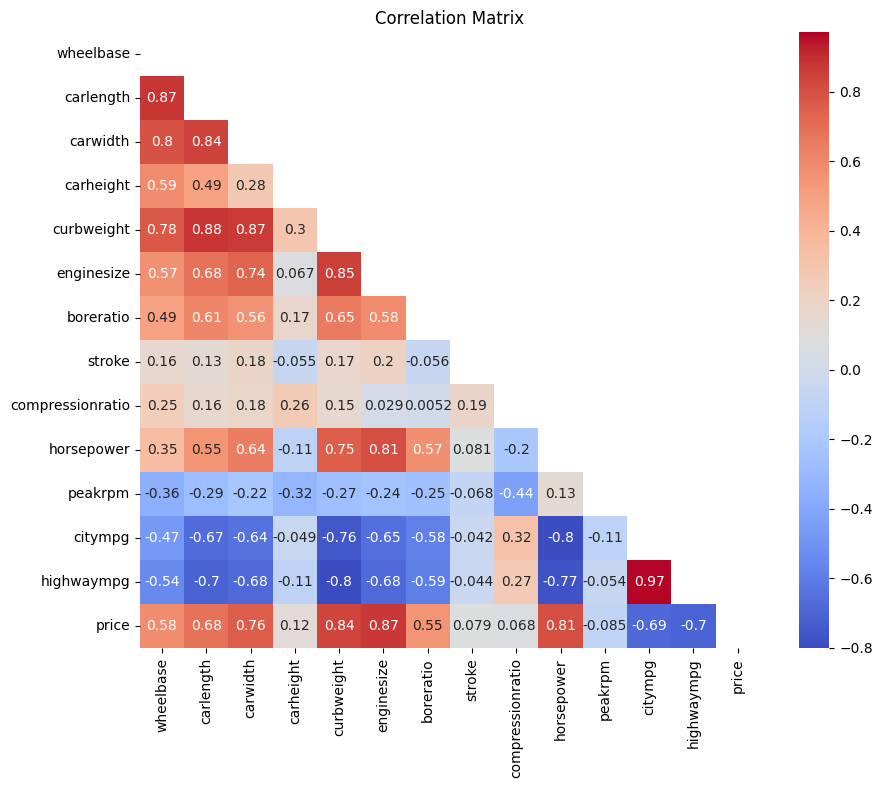

In [19]:
# Visualize the correlation matrix using Seaborn heatmap
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
mask=np.triu(np.ones_like(Corr_mat))
sns.heatmap(Corr_mat, annot=True, cmap='coolwarm',mask=mask)
plt.title('Correlation Matrix')
plt.show()

Relations with price :carlength,carwidth,cubweight,highwaympg,carheight

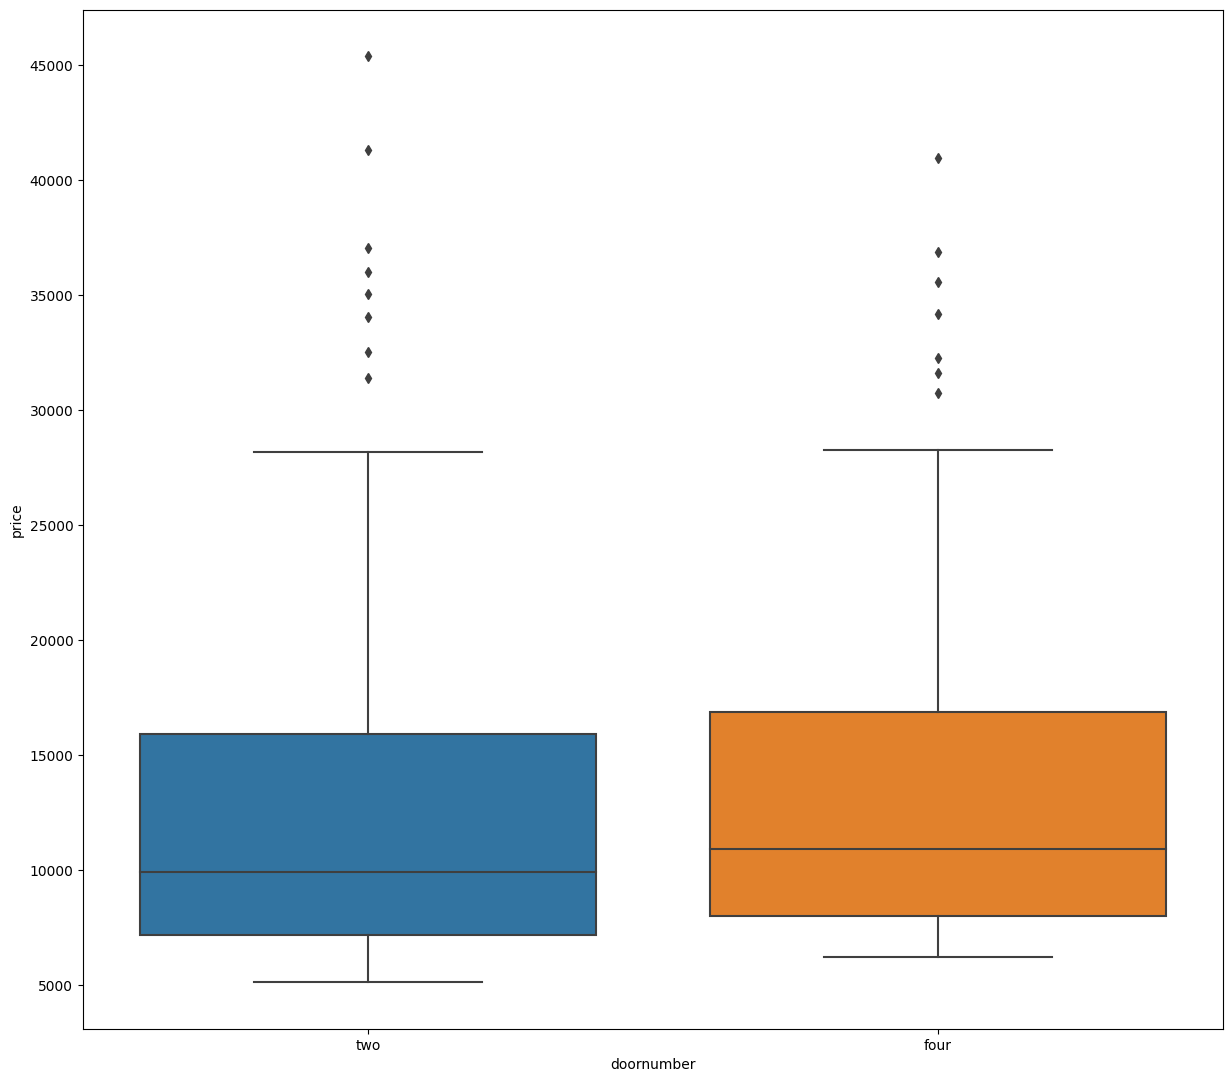

In [20]:
#Boxplot of all the categorical variables
plt.figure(figsize=(50, 45))
plt.subplot(3,3,1)
sns.boxplot(x = 'doornumber', y = 'price', data = df)
# plt.subplot(3,3,2)
# sns.boxplot(x = 'fueltype', y = 'price', data = df)
# plt.subplot(3,3,3)
# sns.boxplot(x = 'aspiration', y = 'price', data = df)
plt.show()


In [124]:
numerical_columns_without_price_carID = [col for col in numerical_columns if col not in ['price', 'car_ID']]
X = df[['carlength','carwidth','curbweight','carheight','highwaympg']]
y=df['price']

In [22]:
X

,carlength,carwidth,curbweight,carheight,highwaympg
0,168.8,64.1,2548,48.8,27
1,168.8,64.1,2548,48.8,27
2,171.2,65.5,2823,52.4,26
3,176.6,66.2,2337,54.3,30
4,176.6,66.4,2824,54.3,22
...,...,...,...,...,...
200,188.8,68.9,2952,55.5,28
201,188.8,68.8,3049,55.5,25
202,188.8,68.9,3012,55.5,23
203,188.8,68.9,3217,55.5,27


**Using Keras**

In [125]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [24]:
X

,carlength,carwidth,curbweight,carheight,highwaympg
0,168.8,64.1,2548,48.8,27
1,168.8,64.1,2548,48.8,27
2,171.2,65.5,2823,52.4,26
3,176.6,66.2,2337,54.3,30
4,176.6,66.4,2824,54.3,22
...,...,...,...,...,...
200,188.8,68.9,2952,55.5,28
201,188.8,68.8,3049,55.5,25
202,188.8,68.9,3012,55.5,23
203,188.8,68.9,3217,55.5,27


In [127]:
X = scaler.fit_transform(X)
y=scaler.fit_transform(y.values.reshape(-1,1))

In [128]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=0,shuffle=True)

In [130]:
y_train.shape[1]

1

In [138]:

import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from keras import regularizers
from keras.layers import BatchNormalization

In [147]:
model = Sequential()

In [148]:
model.add(Dense(10, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear'))

In [149]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_89 (Dense)            (None, 10)                60        
                                                                 
 dense_90 (Dense)            (None, 10)                110       
                                                                 
 dense_91 (Dense)            (None, 1)                 11        
                                                                 
Total params: 181 (724.00 Byte)
Trainable params: 181 (724.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [150]:
from tensorflow.keras.optimizers import SGD,Adam
# sgd = SGD(lr=0.0009)   lr is the learning rate, momentum is an optional parameter
model.compile(optimizer="Adam",loss='mean_squared_error')


In [151]:
history = model.fit(X_train,y_train,batch_size=10,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
15/15 [==============================] - 1s 13ms/step - loss: 1.0601 - val_loss: 0.7568
Epoch 2/100
15/15 [==============================] - 0s 4ms/step - loss: 0.8398 - val_loss: 0.5917
Epoch 3/100
15/15 [==============================] - 0s 4ms/step - loss: 0.7039 - val_loss: 0.4964
Epoch 4/100
15/15 [==============================] - 0s 4ms/step - loss: 0.6212 - val_loss: 0.4231
Epoch 5/100
15/15 [==============================] - 0s 4ms/step - loss: 0.5535 - val_loss: 0.3721
Epoch 6/100
15/15 [==============================] - 0s 4ms/step - loss: 0.5027 - val_loss: 0.3363
Epoch 7/100
15/15 [==============================] - 0s 4ms/step - loss: 0.4653 - val_loss: 0.3066
Epoch 8/100
15/15 [==============================] - 0s 4ms/step - loss: 0.4346 - val_loss: 0.2846
Epoch 9/100
15/15 [==============================] - 0s 4ms/step - loss: 0.4127 - val_loss: 0.2690
Epoch 10/100
15/15 [==============================] - 0s 3ms/step - loss: 0.3942 - val_loss: 0.2561
Epoch 11

In [152]:
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 61ms/step


In [153]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6175502895383971

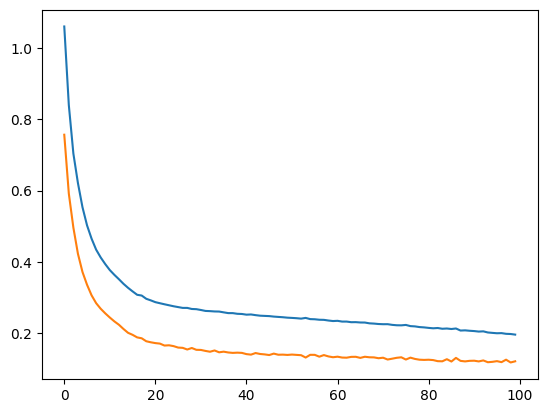

In [154]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

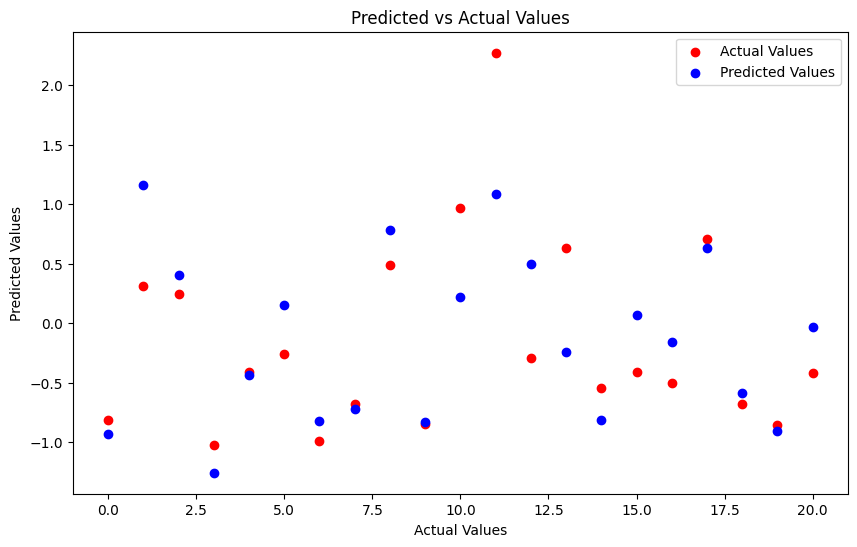

In [155]:
plt.figure(figsize=(10, 6))
# plt.scatter(y_test, y_pred, color='black', label='Predicted vs Actual')
plt.scatter(range(len(y_test)), y_test, color='red', label='Actual Values')
plt.scatter(range(len(y_pred)), y_pred, color='blue', label='Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.show()